In [61]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/PRUEBA_DATA_3.5.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Prueba basica DATA 3.5  8 non-null      object
dtypes: object(1)
memory usage: 220.0+ bytes


In [64]:
from google.colab import drive
drive.mount('/content/drive')

excel_file_path = '/content/drive/MyDrive/PRUEBA_DATA_3.5.xlsx'

df = pd.read_excel(excel_file_path, sheet_name='DATOS 20')

print("DataFrame loaded successfully from 'DATOS 20' sheet.")
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame loaded successfully from 'DATOS 20' sheet.


,nombre_sucursal,nombre_linea,nombre_sublinea,nombre_familia,nombre_tipo,nombre_segmento,nombre_cliente,nombre_comercial,nombre_vendedor,articulo,nombre_corto,nombre_articulo,peso_kgs,fecha,cantidad,kilogramos,importe,margen
0,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039123287,NaN,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,108.0,86.4,1502.820000,71.820000
1,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,7501039123287,NaN,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,360.0,288.0,5400.000000,630.000000
2,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039126233,NaN,ACEITE COMESTIBLE AVE BIDON 10 LTS,10.0,2020-01-01,4.5,45.0,764.859375,42.448661
3,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,75501039120491,NaN,ACEITE COMESTIBLE AVE BIDON 20 LTS,20.0,2020-01-01,4.5,90.0,1612.080000,79.401429
4,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,9657,NaN,MANTECA DE PUERCO,1.0,2020-01-01,30.0,30.0,902.689077,42.985194


In [65]:
columns_to_rename = {
    'nombre_sucursal': 'SUCURSAL',
    'nombre_linea': 'LINEA',
    'nombre_sublinea':'SUBLINEA',
    'nombre_familia':'FAMILIA',
    'nombre_tipo':'TIPO CLIENTE',
    'nombre_segmento':'SEGMENTO CLIENTE',
    'nombre_cliente':'NOMBRE CLIENTE',
    'nombre_comercial':'NOMBRE COMERCIAL',
    'nombre_vendedor':'VENDEDOR',
    'articulo':'SKU',
    'nombre_corto':'NOMBRE CORTO',
    'nombre_articulo':'NOMBRE ARTICULO',
    'peso_kgs':'PESO UNITARIO',
    'fecha':'MES',
    'cantidad':'CANTIDAD',
    'kilogramos':'KILOGRAMOS',
    'importe':'IMPORTE',
    'margen':'MARGEN'
}

df = df.rename(columns=columns_to_rename)

display(df.head())

,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN
0,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039123287,NaN,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,108.0,86.4,1502.820000,71.820000
1,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,7501039123287,NaN,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,360.0,288.0,5400.000000,630.000000
2,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039126233,NaN,ACEITE COMESTIBLE AVE BIDON 10 LTS,10.0,2020-01-01,4.5,45.0,764.859375,42.448661
3,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,75501039120491,NaN,ACEITE COMESTIBLE AVE BIDON 20 LTS,20.0,2020-01-01,4.5,90.0,1612.080000,79.401429
4,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,9657,NaN,MANTECA DE PUERCO,1.0,2020-01-01,30.0,30.0,902.689077,42.985194


In [66]:
# Reemplaza celdas vacías o nulas en NOMBRE CORTO con valores de NOMBRE ARTÍCULO
df['NOMBRE CORTO'].fillna(df['NOMBRE ARTICULO'], inplace=True)

display(df.head())

print("\nNumber of null values in 'NOMBRE CORTO' after operation:")
print(df['NOMBRE CORTO'].isnull().sum())

,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN
0,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039123287,ACEITE GRAN TRADICION 800 ML,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,108.0,86.4,1502.820000,71.820000
1,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,7501039123287,ACEITE GRAN TRADICION 800 ML,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,360.0,288.0,5400.000000,630.000000
2,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039126233,ACEITE COMESTIBLE AVE BIDON 10 LTS,ACEITE COMESTIBLE AVE BIDON 10 LTS,10.0,2020-01-01,4.5,45.0,764.859375,42.448661
3,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,75501039120491,ACEITE COMESTIBLE AVE BIDON 20 LTS,ACEITE COMESTIBLE AVE BIDON 20 LTS,20.0,2020-01-01,4.5,90.0,1612.080000,79.401429
4,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,30.0,30.0,902.689077,42.985194



Number of null values in 'NOMBRE CORTO' after operation:
0


In [67]:
print(f"DataFrame shape before filtering: {df.shape}")

# Define las condiciones de las filas a remover
condition_to_remove = (df['LINEA'] == 'Administración') & (df['TIPO CLIENTE'] == 'SIN TIPO DE CLIENTE')

# Remueve las filas que cumplen con la condición
df = df[~condition_to_remove]

admin_clients_df = df[df['LINEA'] == 'Administración']

admin_clients_df

DataFrame shape before filtering: (56328, 18)


,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN
78,MAYOCAR,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Sin Tipo de Cliente,Mayoreo,Enrique Villa,NaN,DANIELA ALEJANDRA DELGADO CONCHA,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-01-01,6.0,0.000060,0.0300,0.028865
79,MAYOCAR,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Sin Tipo de Cliente,Mayoreo,Angel Rodriguez,NaN,DANIELA ALEJANDRA DELGADO CONCHA,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-01-01,-3.0,-0.000030,-0.0150,-0.014553
80,MAYOCAR,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Sin Tipo de Cliente,Mayoreo,Liliana Cereceres,LILIANA CERECERES,DANIELA ALEJANDRA DELGADO CONCHA,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-01-01,22.5,0.000225,0.1125,0.108993
81,MAYOCAR,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Sin Tipo de Cliente,Mayoreo,Francisco Morales,FRANCISCO MORALES,DANIELA ALEJANDRA DELGADO CONCHA,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-01-01,7.5,0.000075,0.0375,0.036213
82,MAYOCAR,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Sin Tipo de Cliente,Mayoreo,Juan Ramon Prieto,JUAN RAMON PRIETO,DANIELA ALEJANDRA DELGADO CONCHA,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-01-01,7.5,0.000075,0.0375,0.036263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56316,SMC,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-08-01,330.0,0.003300,0.1650,0.006636
56317,SMC,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,158494,TAPA PILGRIMS,TAPA PILGRIMS,0.00001,2020-08-01,330.0,0.003300,0.1650,0.002412
56322,SMC,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,128369,TARIMA PILGRIMS,TARIMA PILGRIMS,1.00000,2020-09-01,15.0,15.000000,0.0075,0.001142
56323,SMC,Administración,CESTAS Y TAPAS,CESTAS Y TAPAS,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,158493,CESTA PILGRIMS,CESTA PILGRIMS,0.00001,2020-09-01,330.0,0.003300,0.1650,0.006636


In [68]:
# Reemplaza celdas vacías en NOMBRE COMERCIAL con valores de la columna NOMBRE CLIENTE
df['NOMBRE COMERCIAL'].fillna(df['NOMBRE CLIENTE'], inplace=True)

display(df.head())

print("\nNumber of null values in 'NOMBRE COMERCIAL' after operation:")
print(df['NOMBRE COMERCIAL'].isnull().sum())

,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN
0,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039123287,ACEITE GRAN TRADICION 800 ML,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,108.0,86.4,1502.820000,71.820000
1,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Super Mayoreo de Carnes de Parral,SMC,VENTAS IN HOUSE MAYOCAR,7501039123287,ACEITE GRAN TRADICION 800 ML,ACEITE GRAN TRADICION 800 ML,0.8,2020-01-01,360.0,288.0,5400.000000,630.000000
2,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,7501039126233,ACEITE COMESTIBLE AVE BIDON 10 LTS,ACEITE COMESTIBLE AVE BIDON 10 LTS,10.0,2020-01-01,4.5,45.0,764.859375,42.448661
3,MAYOCAR,Abarrote,BASICOS COMESTIBLES,ACEITES,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,75501039120491,ACEITE COMESTIBLE AVE BIDON 20 LTS,ACEITE COMESTIBLE AVE BIDON 20 LTS,20.0,2020-01-01,4.5,90.0,1612.080000,79.401429
4,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Ventas in House,Ventas In House,Operadora GONZALEX,MERCADO DE CARNE,VENTAS IN HOUSE MAYOCAR,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,30.0,30.0,902.689077,42.985194



Number of null values in 'NOMBRE COMERCIAL' after operation:
0


In [69]:
# Define la lista de clientes a considerar para remover
clients_to_remove = [
    'MAYOCAR',
    'Super Mayoreo de Carnes de Parral',
    'Operadora GONZALEX',
    'Jaime Chacon Maquila'
]

# Define la condición de 'internal sales' asumiendo 'Ventas in house' en TIPO CLIENTE)
condition_to_remove = (
    (df['TIPO CLIENTE'] == 'Ventas in House') &
    (df['NOMBRE CLIENTE'].isin(clients_to_remove))
)

# Remueve las filas que cumplen con la condición
df = df[~condition_to_remove]

display(df.head())

,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN
5,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Administrativo,Público en General,Irving Omar Chavira Lopez,IRVING OMAR CHAVIRA LOPEZ,EMPLEADO MAYOCAR,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,1.5,1.5,49.8075,5.625832
6,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Institucional,Institucionales,J. Jesus Estrada Briseño,J. JESUS ESTRADA BRISEÑO,DANIELA ALEJANDRA DELGADO CONCHA,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,6.0,6.0,209.7000,40.950417
7,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Sin Tipo de Cliente,Restaurantes A,Campestre de Chihuahua,LA PALAPA,LUZ ELENA DE LA ORTA NAVARRETE,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,18.0,18.0,629.1000,122.849461
8,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Sin Tipo de Cliente,Restaurantes B,Gilberto Chacon Soto,DICONSA,JOHANA NALLELY GONZALEZ GIRON,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,3.0,3.0,104.8500,16.486664
9,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Institucional,Institucionales,Operadora de Negocios y Logistica Roots,Grupo Valencia,YAZMIN ADRIANA PEREZ SILVA,9657,MANTECA DE PUERCO,MANTECA DE PUERCO,1.0,2020-01-01,150.0,150.0,5242.5000,987.874089


In [70]:
conditions = [
    df['SUCURSAL'] == 'MAYOCAR',
    df['SUCURSAL'] == 'MAYOCAR JUAREZ',
    df['SUCURSAL'] == 'GONZALEZ CHIH',
    df['SUCURSAL'] == 'GONZALEZ JRZ',
    df['SUCURSAL'] == 'MAYOCAR PACHECO',
    df['SUCURSAL'] == 'MAYOCAR PACHECO GNX',
    df['SUCURSAL'] == 'MAYOCAR TOLEDO',
    df['SUCURSAL'] == 'NAVIDEÑO GNX',
    df['SUCURSAL'] == 'SMC'
]

choices = [
    'MAYOCAR',
    'MAYOCAR JUAREZ',
    'MAYOCAR',
    'MAYOCAR JUAREZ',
    'MAYOCAR PACHECO',
    'MAYOCAR PACHECO',
    'MAYOCAR TOLEDO',
    'MAYOCAR',
    'SMC'
]

df['SUCURSAL REAL'] = np.select(conditions, choices, default=df['SUCURSAL'])

print("DataFrame with new 'SUCURSAL REAL' column:")
display(df.sample(10))

DataFrame with new 'SUCURSAL REAL' column:


,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,NOMBRE CORTO,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN,SUCURSAL REAL
13898,MAYOCAR,Papas,PAPAS SAZONADAS,PAPAS SAZONADAS,Restaurantes,Restaurantes A,Carolina Esparza Colomo,BAR DIONISIO,LUZ ELENA DE LA ORTA NAVARRETE,046165,Gajo,PAPA GAJO 10 CUT 6/5 C/13.61 KG,13.610,2020-05-01,3.000,40.8300,1199.85000,206.320402,MAYOCAR
36479,MAYOCAR PACHECO GNX,Abarrote,BOTANAS,PAPITAS Y FRITURAS,Sin Tipo de Cliente,Público en General,Ventas de Contado de Autoservicio,Ventas de Contado de Autoservicio,VENTA MOSTRADOR MAYOCAR,100583,CHEETOS BOLI 42 GRS,CHEETOS BOLI 42 GRS,0.042,2020-08-01,0.000,0.0000,0.00000,-15.911111,MAYOCAR PACHECO
7110,MAYOCAR,Salchichoneria,EMBUTIDOS,TOCINO,Restaurantes,Restaurantes B,Luis Gerardo Chavira Perez,TALLER DEL CHEF,JOHANA NALLELY GONZALEZ GIRON,0029,TOCINO REBANADO AHUMADO,TOCINO REBANADO AHUMADO,1.000,2020-02-01,3.000,3.0000,299.85000,82.350000,MAYOCAR
35691,MAYOCAR PACHECO GNX,Salchichoneria,EMBUTIDOS,JAMON,Publico en General,Público en General,Venta Global Diaria,Venta Global Diaria,VENTA MOSTRADOR MAYOCAR,7501518463200,JAMON COCIDO BAFAR 50 REB,JAMON COCIDO BAFAR 50 REB,0.550,2020-06-01,31.500,17.3250,1368.67500,251.849993,MAYOCAR PACHECO
37243,MAYOCAR PACHECO GNX,Abarrote,MR WINGS,SALSA 414 ML,Publico en General,Público en General,Venta Global Diaria,Venta Global Diaria,VENTA MOSTRADOR MAYOCAR,7503035333264,MR. WINGS SALSA MANGO HABANERO 414 ML,MR. WINGS SALSA MANGO HABANERO 414 ML,0.414,2020-09-01,34.500,14.2830,947.02500,339.977463,MAYOCAR PACHECO
143,MAYOCAR,Aguacate y Snacks,Snacks,SNACKS,Sin Tipo de Cliente,Mayoreo,Victor Enrique Romo Romo,VICTOR ENRIQUE ROMO ROMO,DANIELA ALEJANDRA DELGADO CONCHA,19636,AROS DE CEBOLLA,AROS DE CEBOLLA MC EMP BOLSA .907GRS,0.907,2020-01-01,3.000,2.7210,179.85000,50.532930,MAYOCAR
7991,MAYOCAR,Papas,PAPAS CONGELADAS,PAPAS CON A PRUEBA,Tiendas,Mayoreo,Super del Sol,ABARROTES DEL SOL,DANIELA ALEJANDRA DELGADO CONCHA,01265,PAPA 1/4 LINEA,PAPA FRANCESA MC CAIN 1/4 C/16.33 KG,16.330,2020-03-01,4.500,73.4850,1799.77500,348.710651,MAYOCAR
36403,MAYOCAR PACHECO GNX,Abarrote,BEBIDAS NO ALCOHÓLICAS,REFRESCOS,Publico en General,Público en General,Venta Global Diaria,Venta Global Diaria,VENTA MOSTRADOR MAYOCAR,75007614,COCA COLA 600 ML,COCA COLA 600 ML,0.600,2020-08-01,402.000,241.2000,4401.90000,762.405128,MAYOCAR PACHECO
12952,MAYOCAR,Res,PULPA DE RES,PULPAS DE RES,Institucional,Institucionales,Grupo Valencia Saenz,VAFI,YAZMIN ADRIANA PEREZ SILVA,8992,PULPA DE RES TACO,PULPA DE RES TACO,1.000,2020-04-01,-151.425,-151.4250,-9692.47875,-2806.032466,MAYOCAR
43908,MAYOCAR TOLEDO,Salchichoneria,LACTEOS Y DERIVADOS,QUESO,Publico en General,Público en General,Venta Global Diaria,Venta Global Diaria,VENTA MOSTRADOR MAYOCAR,7501518476347,QUESO PARMESANO PARMA 227 GRS,QUESO PARMESANO PARMA 227 GRS,0.227,2020-03-01,1.500,0.3405,104.17500,17.925000,MAYOCAR TOLEDO


# Task
Analyze the `df` DataFrame to understand historical sales and profitability for 2020. This analysis should include converting the 'MES' column to datetime objects and extracting year and month. Aggregate key metrics ('IMPORTE', 'CANTIDAD', 'KILOGRAMOS', 'MARGEN') by month and year to identify overall trends and seasonality. Perform a segmented performance analysis by grouping these metrics by 'SUCURSAL REAL', 'LINEA', 'SEGMENTO CLIENTE', 'VENDEDOR', and 'SKU' to pinpoint areas of strong or weak performance. Conduct a profitability analysis by examining 'MARGEN' across 'LINEA', 'SUBLINEA', 'SEGMENTO CLIENTE', and 'SKU'. Visualize these insights using line charts for time trends and bar charts for segment comparisons, and create pivot tables for detailed breakdowns. Finally, discuss how the insights from the 2020 historical data can inform short-term and medium-term strategies, acknowledging the lack of direct 2025 data and proposing methods for extrapolating historical trends for 2025 estimates.

## Preparación de Datos para Análisis de Series de Tiempo

### Subtarea:
Convertir la columna “MES” a objetos de tipo datetime para permitir agregaciones y análisis basados en el tiempo, y extraer los componentes de año y mes.


Para habilitar el análisis basado en el tiempo, convertiré la columna “MES” a objetos de tipo datetime y luego extraeré el año y el mes en nuevas columnas, según lo indicado.



In [71]:
df['MES'] = pd.to_datetime(df['MES'])
df['YEAR'] = df['MES'].dt.year
df['MONTH'] = df['MES'].dt.month

display(df.head())

,SUCURSAL,LINEA,SUBLINEA,FAMILIA,TIPO CLIENTE,SEGMENTO CLIENTE,NOMBRE CLIENTE,NOMBRE COMERCIAL,VENDEDOR,SKU,...,NOMBRE ARTICULO,PESO UNITARIO,MES,CANTIDAD,KILOGRAMOS,IMPORTE,MARGEN,SUCURSAL REAL,YEAR,MONTH
5,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Administrativo,Público en General,Irving Omar Chavira Lopez,IRVING OMAR CHAVIRA LOPEZ,EMPLEADO MAYOCAR,9657,...,MANTECA DE PUERCO,1.0,2020-01-01,1.5,1.5,49.8075,5.625832,MAYOCAR,2020,1
6,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Institucional,Institucionales,J. Jesus Estrada Briseño,J. JESUS ESTRADA BRISEÑO,DANIELA ALEJANDRA DELGADO CONCHA,9657,...,MANTECA DE PUERCO,1.0,2020-01-01,6.0,6.0,209.7000,40.950417,MAYOCAR,2020,1
7,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Sin Tipo de Cliente,Restaurantes A,Campestre de Chihuahua,LA PALAPA,LUZ ELENA DE LA ORTA NAVARRETE,9657,...,MANTECA DE PUERCO,1.0,2020-01-01,18.0,18.0,629.1000,122.849461,MAYOCAR,2020,1
8,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Sin Tipo de Cliente,Restaurantes B,Gilberto Chacon Soto,DICONSA,JOHANA NALLELY GONZALEZ GIRON,9657,...,MANTECA DE PUERCO,1.0,2020-01-01,3.0,3.0,104.8500,16.486664,MAYOCAR,2020,1
9,MAYOCAR,Abarrote,BASICOS COMESTIBLES,MANTECA,Institucional,Institucionales,Operadora de Negocios y Logistica Roots,Grupo Valencia,YAZMIN ADRIANA PEREZ SILVA,9657,...,MANTECA DE PUERCO,1.0,2020-01-01,150.0,150.0,5242.5000,987.874089,MAYOCAR,2020,1


## Analizar el Desempeño Histórico y las Tendencias (2020)
### Subtarea:
Agregar métricas clave como “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN” por mes y año para comprender las tendencias históricas generales y la estacionalidad.


Para analizar las tendencias históricas generales y la estacionalidad, agruparé el DataFrame por “YEAR” y “MONTH”, y calcularé la suma de las métricas clave “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”.



In [72]:
monthly_trends = df.groupby(['YEAR', 'MONTH']).agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

display(monthly_trends.head())

,YEAR,MONTH,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,2020,1,3.011842e+07,726087.819525,870736.733373,4.679953e+06
1,2020,2,2.883826e+07,721537.602000,846729.966615,3.984317e+06
2,2020,3,2.692314e+07,684191.683650,802233.699915,3.923412e+06
3,2020,4,2.266693e+07,517865.038545,639127.034625,3.408637e+06
4,2020,5,2.031981e+07,427749.565500,562164.716257,3.344535e+06


Para visualizar las tendencias históricas generales y la estacionalidad, crearé gráficos de líneas para cada una de las métricas clave agregadas (“IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”) a lo largo del tiempo, mostrando las variaciones mensuales.



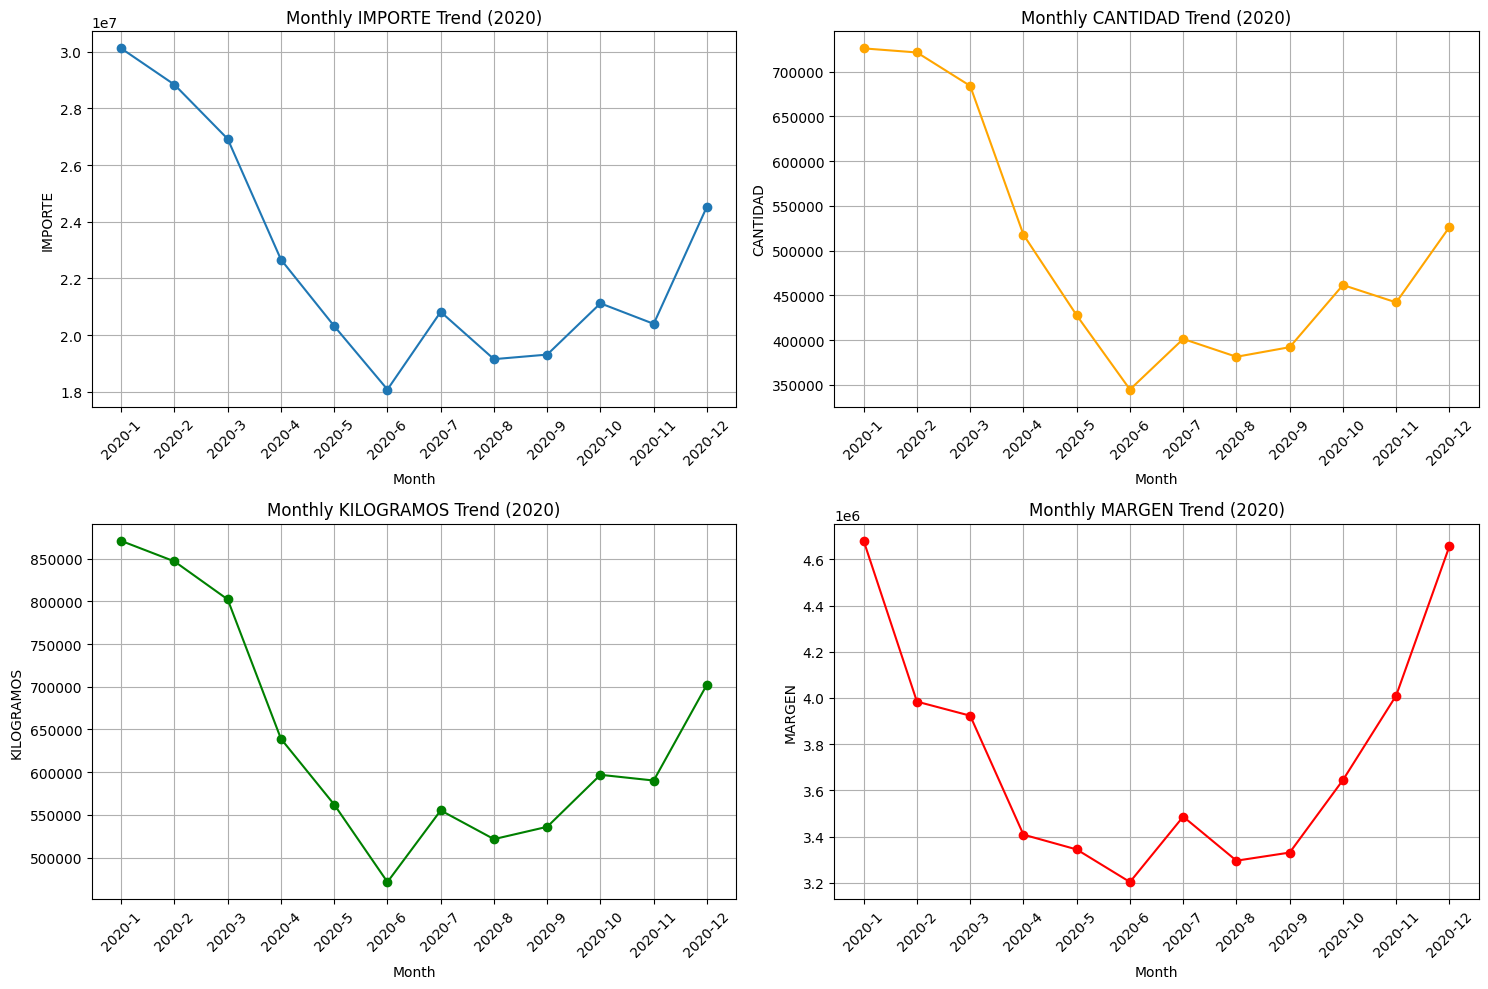

In [73]:
plt.figure(figsize=(15, 10))

# Plot IMPOPRTE
plt.subplot(2, 2, 1)
plt.plot(monthly_trends['YEAR'].astype(str) + '-' + monthly_trends['MONTH'].astype(str), monthly_trends['IMPORTE'], marker='o')
plt.title('Monthly IMPORTE Trend (2020)')
plt.xlabel('Month')
plt.ylabel('IMPORTE')
plt.xticks(rotation=45)
plt.grid(True)

# Plot CANTIDAD
plt.subplot(2, 2, 2)
plt.plot(monthly_trends['YEAR'].astype(str) + '-' + monthly_trends['MONTH'].astype(str), monthly_trends['CANTIDAD'], marker='o', color='orange')
plt.title('Monthly CANTIDAD Trend (2020)')
plt.xlabel('Month')
plt.ylabel('CANTIDAD')
plt.xticks(rotation=45)
plt.grid(True)

# Plot KILOGRAMOS
plt.subplot(2, 2, 3)
plt.plot(monthly_trends['YEAR'].astype(str) + '-' + monthly_trends['MONTH'].astype(str), monthly_trends['KILOGRAMOS'], marker='o', color='green')
plt.title('Monthly KILOGRAMOS Trend (2020)')
plt.xlabel('Month')
plt.ylabel('KILOGRAMOS')
plt.xticks(rotation=45)
plt.grid(True)

# Plot MARGEN
plt.subplot(2, 2, 4)
plt.plot(monthly_trends['YEAR'].astype(str) + '-' + monthly_trends['MONTH'].astype(str), monthly_trends['MARGEN'], marker='o', color='red')
plt.title('Monthly MARGEN Trend (2020)')
plt.xlabel('Month')
plt.ylabel('MARGEN')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Análisis de Desempeño Segmentado
### Subtarea:

Desglosar las métricas agregadas por “SUCURSAL REAL”, “LINEA”, “SEGMENTO CLIENTE”, “VENDEDOR” y “SKU”.


Para realizar un análisis de desempeño segmentado, agruparé el DataFrame df por “SUCURSAL REAL” y calcularé la suma de “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”, y luego mostraré las primeras filas del DataFrame resultante.



In [74]:
performance_by_sucursal = df.groupby('SUCURSAL REAL').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Performance by SUCURSAL REAL:")
display(performance_by_sucursal.head())

Performance by SUCURSAL REAL:


,SUCURSAL REAL,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,GONZALEX CHIH,6.174605e+07,1.247412e+06,1.762879e+06,1.062079e+07
1,GONZALEX JRZ,3.830339e+07,6.690213e+05,1.156047e+06,5.846953e+06
2,MAYOCAR,8.243386e+07,2.000961e+06,2.381204e+06,1.210045e+07
3,MAYOCAR JUAREZ,3.423624e+07,6.962505e+05,1.064247e+06,4.054785e+06
4,MAYOCAR PACHECO,2.589441e+07,6.766044e+05,6.438575e+05,6.141392e+06


Para continuar con el análisis de desempeño segmentado, agruparé el DataFrame df por “LINEA” y calcularé la suma de “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”, y luego mostraré las primeras filas del DataFrame resultante.


In [75]:
performance_by_linea = df.groupby('LINEA').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Performance by LINEA:")
display(performance_by_linea.head())

Performance by LINEA:


,LINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,Abarrote,4.095778e+06,250077.26700,147378.585600,7.471040e+05
1,Administración,5.092500e+00,1018.50000,0.010185,4.780256e+00
2,Aguacate y Snacks,2.832166e+06,33805.47900,38691.647268,6.872483e+05
3,Alas,2.550087e+07,710329.20165,710329.201650,5.430939e+06
4,Comida Preparada,1.119296e+06,18864.00000,15454.830000,2.563880e+05


Para continuar con el análisis de desempeño segmentado, agruparé el DataFrame df por “SEGMENTO CLIENTE” y calcularé la suma de “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”, y luego mostraré las primeras filas del DataFrame resultante.


In [76]:
performance_by_segmento = df.groupby('SEGMENTO CLIENTE').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Performance by SEGMENTO CLIENTE:")
display(performance_by_segmento.head())

Performance by SEGMENTO CLIENTE:


,SEGMENTO CLIENTE,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,Institucionales,3.867290e+07,1.003987e+06,1.048659e+06,6.557324e+06
1,Juarez A,4.641796e+07,7.105617e+05,1.388107e+06,6.971628e+06
2,Juarez B,2.575509e+07,5.706029e+05,7.902571e+05,3.055718e+06
3,Mayoreo,5.458129e+07,1.387861e+06,1.745680e+06,7.055596e+06
4,Público en General,5.711561e+07,1.452988e+06,1.372193e+06,1.249776e+07


Para continuar con el análisis de desempeño segmentado, agruparé el DataFrame df por “VENDEDOR” y calcularé la suma de “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”, y luego mostraré las primeras filas del DataFrame resultante.


In [77]:
performance_by_vendedor = df.groupby('VENDEDOR').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Performance by VENDEDOR:")
display(performance_by_vendedor.head())

Performance by VENDEDOR:


,VENDEDOR,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,ALFREDO CENICEROS MENDOZA,6.383885e+05,2.194308e+04,2.192823e+04,3.458552e+04
1,BENJAMIN AZAEL RODRIGUEZ TREJO,4.693734e+05,1.125261e+04,1.138597e+04,9.973388e+04
2,CARMEN ABRIL HOLGUIN CHAVEZ,2.418210e+03,5.417250e+01,5.102250e+01,4.666475e+02
3,CHARLES BREMER FIELD,2.517536e+06,6.813358e+04,6.813358e+04,3.354624e+05
4,DANIELA ALEJANDRA DELGADO CONCHA,5.456543e+07,1.386806e+06,1.745017e+06,7.085770e+06


Para completar el análisis de desempeño segmentado, agruparé el DataFrame df por “SKU” y calcularé la suma de “IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”, y luego mostraré las primeras filas del DataFrame resultante.


In [78]:
performance_by_sku = df.groupby('SKU').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Performance by SKU:")
display(performance_by_sku.head())

Performance by SKU:


,SKU,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,0001,5.096889e+05,16789.5000,16789.5000,34802.737750
1,00011,5.725525e+05,23668.6260,23668.6260,28174.069500
2,00015,1.776950e+05,2923.8300,2923.8300,35183.406355
3,0002,9.072814e+05,29923.7700,29923.7700,67275.734950
4,0003,1.460210e+06,49533.7365,49533.7365,65327.022858


## Análisis de Rentabilidad
### Subtarea:
Examinar el “MARGEN” a través de diferentes dimensiones (“LINEA”, “SUBLINEA”, “SEGMENTO CLIENTE”, “SKU”) para identificar áreas de alta y baja rentabilidad.


Para identificar áreas de alta y baja rentabilidad por “LINEA”, ordenaré el DataFrame performance_by_linea por “MARGEN” en orden ascendente y descendente para obtener las 5 líneas con menor margen y las 5 con mayor margen, respectivamente. Esto aborda la primera instrucción.


In [79]:
print("Top 5 LINEA by MARGEN:")
display(performance_by_linea.sort_values(by='MARGEN', ascending=False).head())

print("Bottom 5 LINEA by MARGEN:")
display(performance_by_linea.sort_values(by='MARGEN', ascending=True).head())

Top 5 LINEA by MARGEN:


,LINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
7,Papas,5.087950e+07,3.058935e+05,1.944153e+06,1.001384e+07
9,Pechugas,7.894547e+07,2.103628e+06,2.103628e+06,8.743166e+06
3,Alas,2.550087e+07,7.103292e+05,7.103292e+05,5.430939e+06
10,Pollo Valor Agregado,2.543573e+07,4.134882e+05,4.134882e+05,4.822417e+06
15,Res,1.938882e+07,3.522133e+05,3.522133e+05,4.084641e+06


Bottom 5 LINEA by MARGEN:


,LINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
17,Sin Definir,7.500000e-03,1.50,0.001500,0.006750
1,Administración,5.092500e+00,1018.50,0.010185,4.780256
4,Comida Preparada,1.119296e+06,18864.00,15454.830000,256388.006039
8,Paquetes,1.666935e+06,14701.50,52359.000000,338241.797405
6,Hamburguesas,2.917337e+06,18860.79,53217.612156,429335.152079


Para continuar con el análisis de rentabilidad, ahora identificaré los 5 mejores y 5 peores “SEGMENTO CLIENTE” ordenando el DataFrame performance_by_segmento por “MARGEN” en orden descendente y ascendente, respectivamente, y luego mostraré estos resultados.


In [80]:
print("Top 5 SEGMENTO CLIENTE by MARGEN:")
display(performance_by_segmento.sort_values(by='MARGEN', ascending=False).head())

print("Bottom 5 SEGMENTO CLIENTE by MARGEN:")
display(performance_by_segmento.sort_values(by='MARGEN', ascending=True).head())

Top 5 SEGMENTO CLIENTE by MARGEN:


,SEGMENTO CLIENTE,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
4,Público en General,5.711561e+07,1.452988e+06,1.372193e+06,1.249776e+07
3,Mayoreo,5.458129e+07,1.387861e+06,1.745680e+06,7.055596e+06
1,Juarez A,4.641796e+07,7.105617e+05,1.388107e+06,6.971628e+06
0,Institucionales,3.867290e+07,1.003987e+06,1.048659e+06,6.557324e+06
5,Restaurantes A,2.577828e+07,4.380314e+05,7.076268e+05,4.847099e+06


Bottom 5 SEGMENTO CLIENTE by MARGEN:


,SEGMENTO CLIENTE,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
7,Ventas In House,8.509350e+03,213.00000,213.000000,1.799850e+03
8,Ventas a Detalle,1.390625e+06,47711.27100,47807.316300,6.954563e+04
2,Juarez B,2.575509e+07,570602.87550,790257.125415,3.055718e+06
6,Restaurantes B,2.256505e+07,415529.06283,594707.231442,3.914584e+06
5,Restaurantes A,2.577828e+07,438031.40295,707626.752819,4.847099e+06


Para continuar con el análisis de rentabilidad, ahora identificaré los 5 mejores y 5 peores “SKU” ordenando el DataFrame performance_by_sku por “MARGEN” en orden descendente y ascendente, respectivamente, y luego mostraré estos resultados.


In [81]:
print("Top 5 SKU by MARGEN:")
display(performance_by_sku.sort_values(by='MARGEN', ascending=False).head())

print("Bottom 5 SKU by MARGEN:")
display(performance_by_sku.sort_values(by='MARGEN', ascending=True).head())

Top 5 SKU by MARGEN:


,SKU,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
158,1010,6.547633e+07,1.759954e+06,1.759954e+06,6.662955e+06
323,40134,1.403712e+07,3.562102e+05,3.562102e+05,2.023792e+06
50,023937,1.020848e+07,3.469570e+04,4.722085e+05,1.956241e+06
110,043386,6.699165e+06,1.416740e+04,1.928182e+05,1.829363e+06
907,8564,5.409992e+06,1.524447e+05,1.524447e+05,1.794771e+06


Bottom 5 SKU by MARGEN:


,SKU,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
221,1786,2872.278750,29.175,29.175,-833.307959
885,7799,36353.775001,1414.500,4243.500,-752.049220
219,1741,1120.500000,15.000,51.900,-622.575000
442,6631,4441.672500,150.000,150.000,-539.485610
687,7501055303540,7553.475000,475.500,713.250,-167.568375


Para continuar con el análisis de rentabilidad, agregaré el DataFrame df por “SUBLINEA” y calcularé la suma de las métricas clave (“IMPORTE”, “CANTIDAD”, “KILOGRAMOS” y “MARGEN”) para crear el DataFrame profitability_by_sublinea, conforme a las instrucciones.


In [82]:
profitability_by_sublinea = df.groupby('SUBLINEA').agg({
    'IMPORTE': 'sum',
    'CANTIDAD': 'sum',
    'KILOGRAMOS': 'sum',
    'MARGEN': 'sum'
}).reset_index()

print("Profitability by SUBLINEA:")
display(profitability_by_sublinea.head())

Profitability by SUBLINEA:


,SUBLINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
0,Alas,2.550087e+07,710329.20165,710329.20165,5.430939e+06
1,BASICOS COMESTIBLES,3.367823e+05,11572.62000,12803.61000,6.352189e+04
2,BEBIDAS NO ALCOHÓLICAS,5.865902e+05,51709.50000,46852.09050,3.156298e+04
3,BOTANAS,2.303497e+05,20882.70750,1501.94100,2.817117e+04
4,BÁSICOS NO COMESTIBLES,3.805925e+04,2138.29500,1453.98900,6.482274e+03


Para completar el análisis de rentabilidad, ahora identificaré las 5 mejores y 5 peores “SUBLINEA” ordenando el DataFrame profitability_by_sublinea por “MARGEN” en orden descendente y ascendente, respectivamente, y luego mostraré estos resultados.


In [83]:
print("Top 5 SUBLINEA by MARGEN:")
display(profitability_by_sublinea.sort_values(by='MARGEN', ascending=False).head())

print("Bottom 5 SUBLINEA by MARGEN:")
display(profitability_by_sublinea.sort_values(by='MARGEN', ascending=True).head())

Top 5 SUBLINEA by MARGEN:


,SUBLINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
31,PECHUGAS DE POLLO,7.894547e+07,2.103628e+06,2.103628e+06,8.743166e+06
0,Alas,2.550087e+07,7.103292e+05,7.103292e+05,5.430939e+06
42,Pollo Valor Agregado,2.543573e+07,4.134882e+05,4.134882e+05,4.822417e+06
27,PAPAS ESPECIALIZADAS,2.083888e+07,7.488499e+04,8.332796e+05,4.425638e+06
28,PAPAS SAZONADAS,1.774388e+07,1.187052e+05,5.885808e+05,3.512125e+06


Bottom 5 SUBLINEA by MARGEN:


,SUBLINEA,IMPORTE,CANTIDAD,KILOGRAMOS,MARGEN
46,SIN DEFINIR,0.00750,1.50,0.001500,0.006750
6,CESTAS Y TAPAS,5.09250,1018.50,0.010185,4.780256
13,FRUTAS,272.40075,7.86,7.860000,60.843750
12,ESPECIAS,989.17500,76.50,6.492000,291.495316
30,PASTAS,6025.80000,669.00,55.332000,1328.104502


## Visualización y Reporte
### Subtarea:
Presentar los hallazgos utilizando visualizaciones adecuadas: gráficos de barras para comparar el desempeño entre diferentes segmentos (por ejemplo, ventas por “SUCURSAL REAL”) y tablas dinámicas para desgloses detallados.


Para visualizar el desempeño por “SUCURSAL REAL”, crearé gráficos de barras para “IMPORTE” y “MARGEN” a partir del DataFrame performance_by_sucursal, mostrándolos en subgráficos separados, según lo indicado.


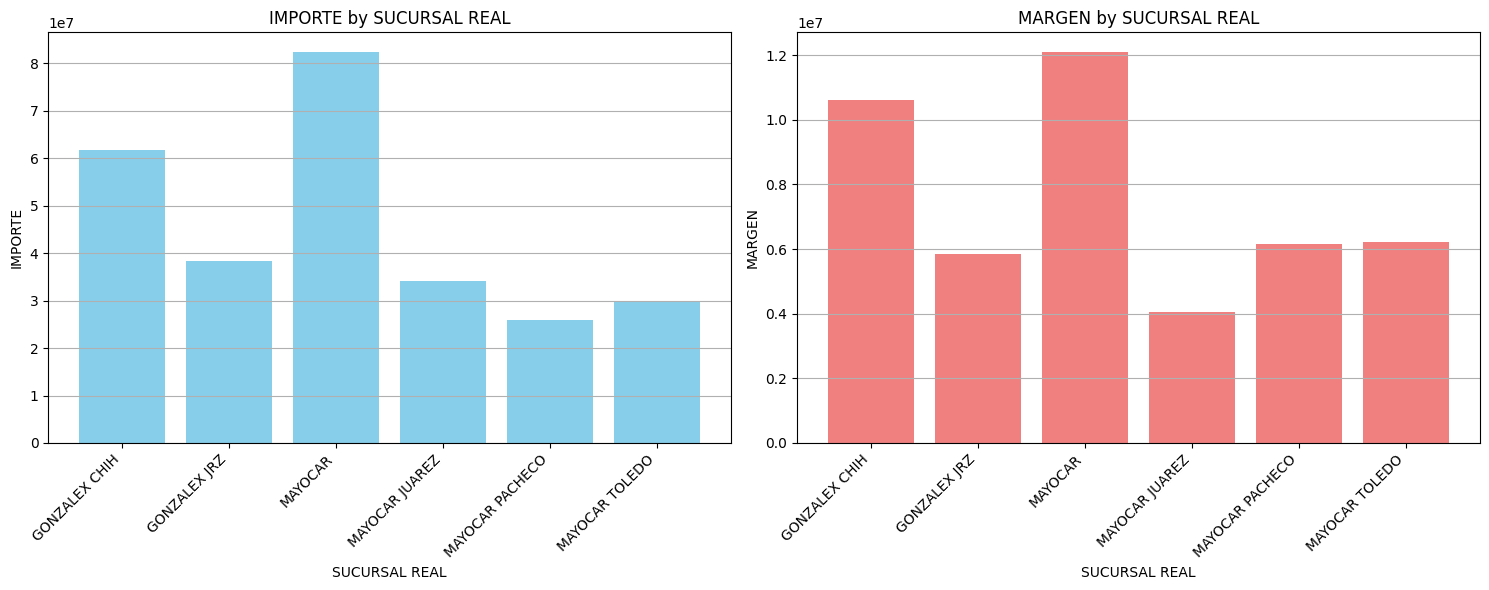

In [84]:
plt.figure(figsize=(15, 6))

# Gráfico de barras para IMPORTE por SUCURSAL REAL
plt.subplot(1, 2, 1)
plt.bar(performance_by_sucursal['SUCURSAL REAL'], performance_by_sucursal['IMPORTE'], color='skyblue')
plt.title('IMPORTE by SUCURSAL REAL')
plt.xlabel('SUCURSAL REAL')
plt.ylabel('IMPORTE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Gráfico de barras para MARGEN por SUCURSAL REAL
plt.subplot(1, 2, 2)
plt.bar(performance_by_sucursal['SUCURSAL REAL'], performance_by_sucursal['MARGEN'], color='lightcoral')
plt.title('MARGEN by SUCURSAL REAL')
plt.xlabel('SUCURSAL REAL')
plt.ylabel('MARGEN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Para visualizar el desempeño por “LINEA”, crearé gráficos de barras para “IMPORTE” y “MARGEN” a partir del DataFrame performance_by_linea, mostrándolos en subgráficos separados, según lo indicado.


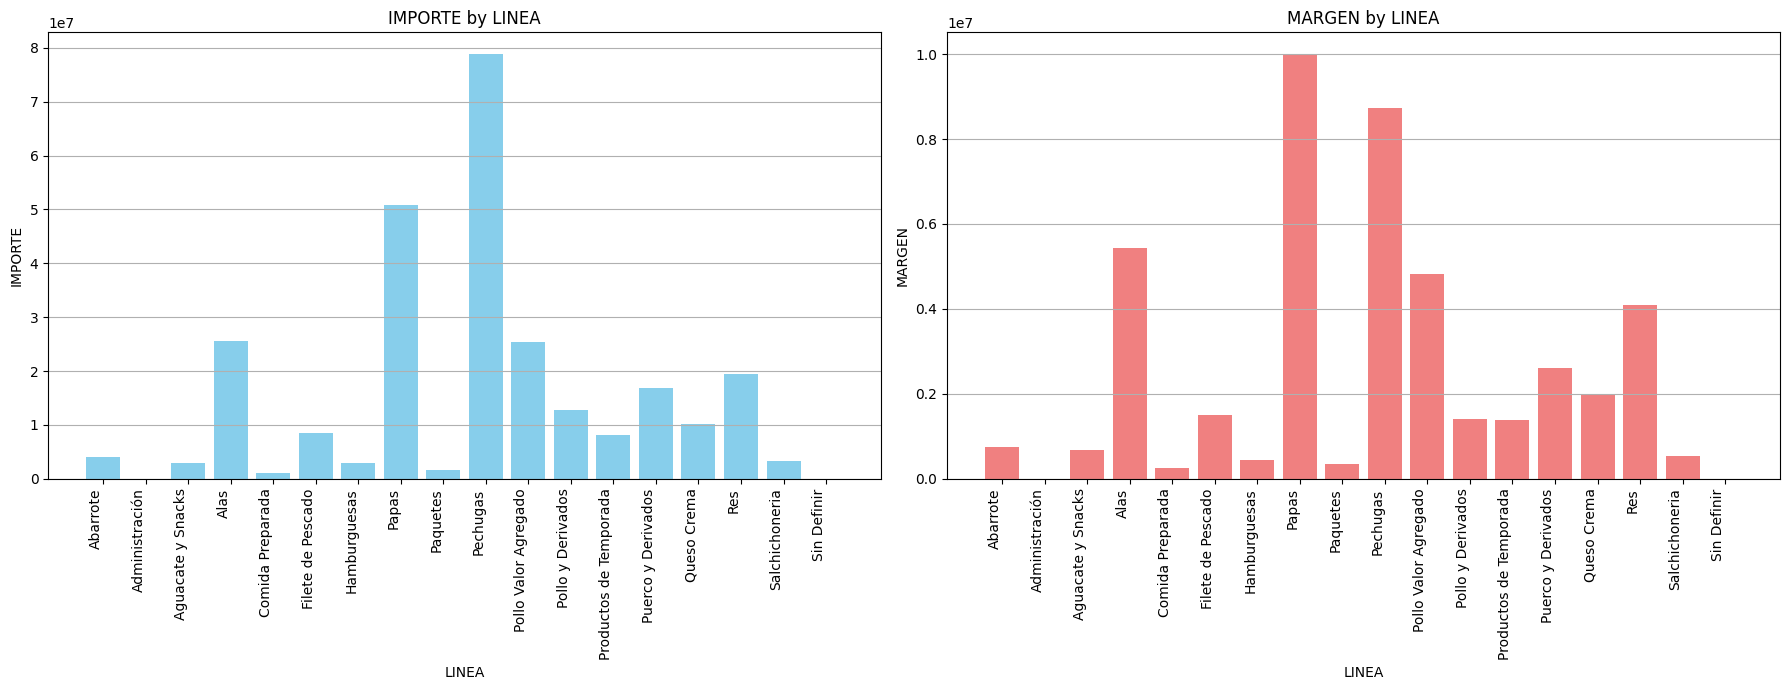

In [85]:
plt.figure(figsize=(18, 7))

# Gráfico de barras sobre IMPORTE por LINEA
plt.subplot(1, 2, 1)
plt.bar(performance_by_linea['LINEA'], performance_by_linea['IMPORTE'], color='skyblue')
plt.title('IMPORTE by LINEA')
plt.xlabel('LINEA')
plt.ylabel('IMPORTE')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

# Gráfico de barras para MARGEN por LINEA
plt.subplot(1, 2, 2)
plt.bar(performance_by_linea['LINEA'], performance_by_linea['MARGEN'], color='lightcoral')
plt.title('MARGEN by LINEA')
plt.xlabel('LINEA')
plt.ylabel('MARGEN')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Para visualizar el desempeño por “SEGMENTO CLIENTE”, crearé gráficos de barras para “IMPORTE” y “MARGEN” a partir del DataFrame performance_by_segmento, mostrándolos en subgráficos separados, según lo indicado.


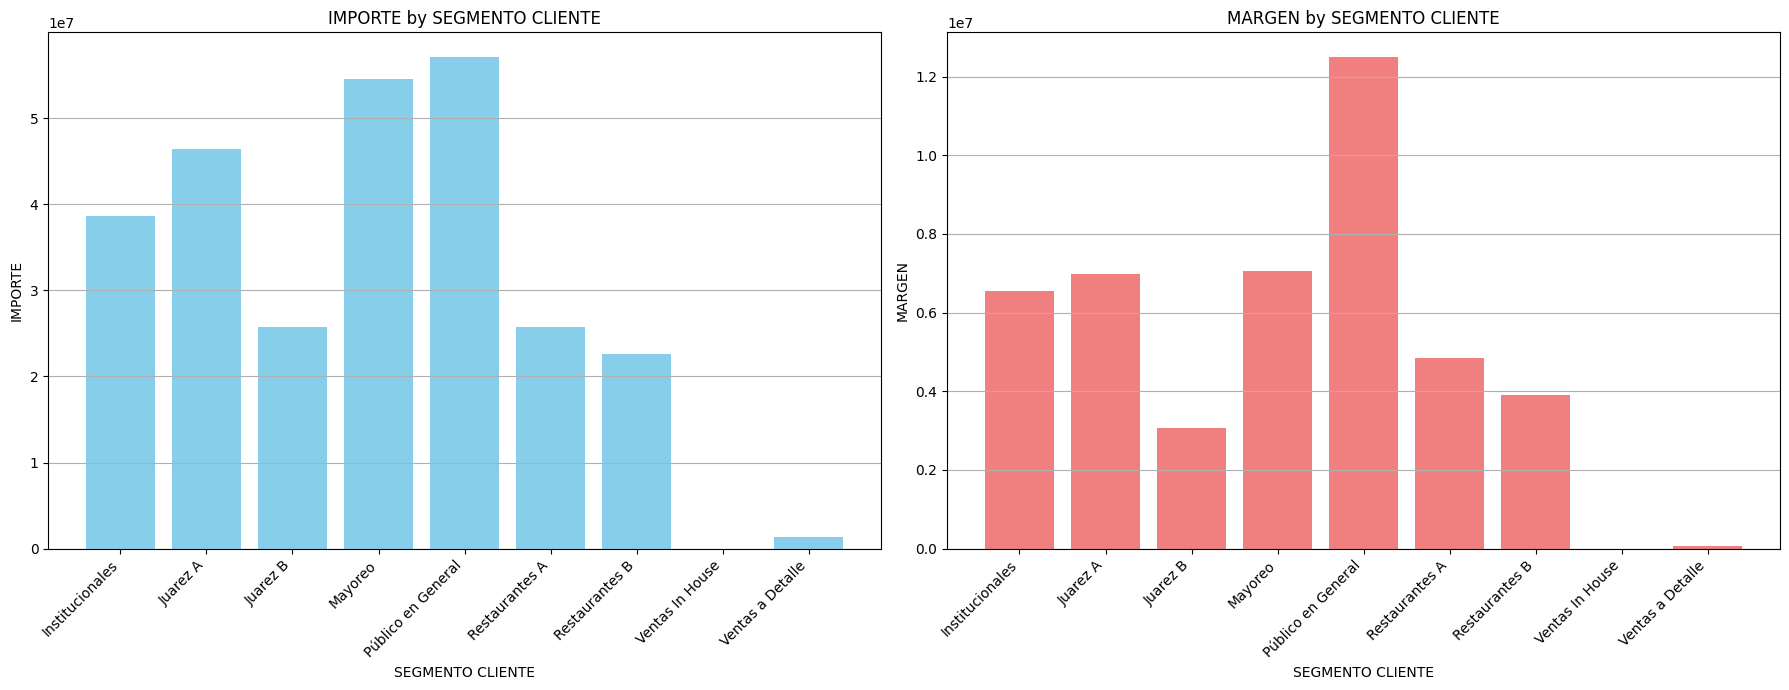

In [86]:
plt.figure(figsize=(18, 7))

# Gráfico de barras para IMPORTE por SEGMENTO CLIENTE
plt.subplot(1, 2, 1)
plt.bar(performance_by_segmento['SEGMENTO CLIENTE'], performance_by_segmento['IMPORTE'], color='skyblue')
plt.title('IMPORTE by SEGMENTO CLIENTE')
plt.xlabel('SEGMENTO CLIENTE')
plt.ylabel('IMPORTE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Gráfico de barras para MARGEN por SEGMENTO CLIENTE
plt.subplot(1, 2, 2)
plt.bar(performance_by_segmento['SEGMENTO CLIENTE'], performance_by_segmento['MARGEN'], color='lightcoral')
plt.title('MARGEN by SEGMENTO CLIENTE')
plt.xlabel('SEGMENTO CLIENTE')
plt.ylabel('MARGEN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Para visualizar el top 10 de desempeño por “VENDEDOR”, ordenaré el DataFrame performance_by_vendedor por “IMPORTE” y “MARGEN”, respectivamente, seleccionaré los 10 principales en cada caso y luego crearé gráficos de barras, mostrándolos en subgráficos separados, según lo indicado.


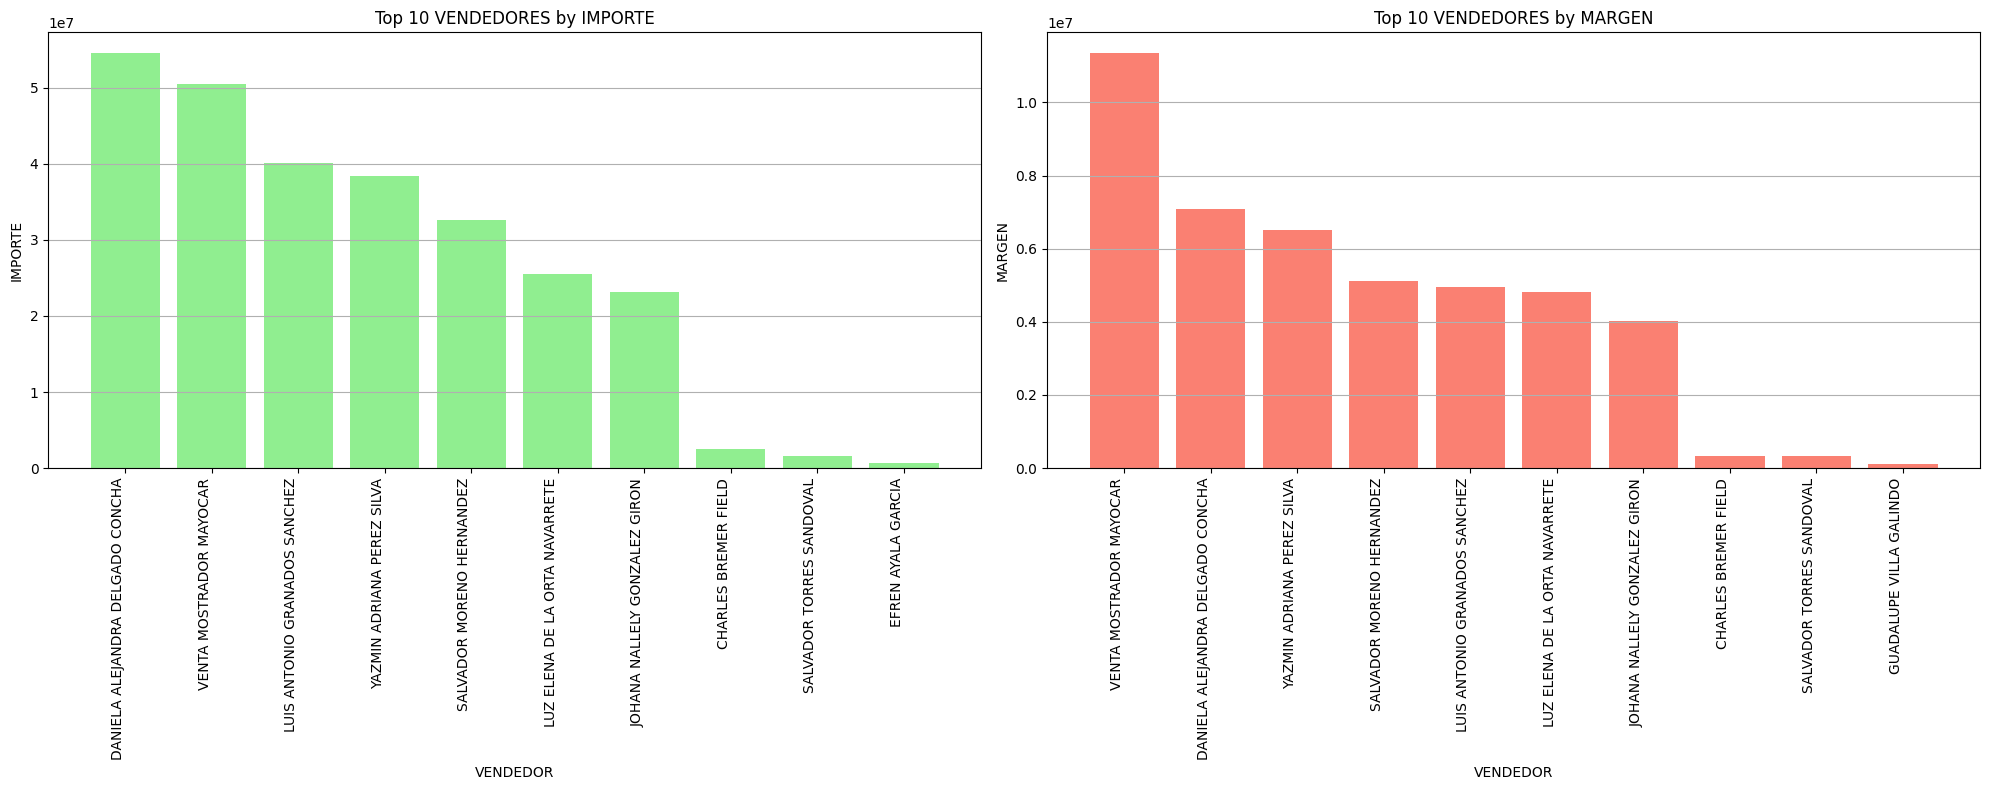

In [87]:
plt.figure(figsize=(20, 8))

# Se ordena por IMPORTE y se obtiene el top 10 de vendedores
top_10_importe_vendedor = performance_by_vendedor.sort_values(by='IMPORTE', ascending=False).head(10)

# Gráfico de barras para el top 10 de IMPORTE por VENDEDOR
plt.subplot(1, 2, 1)
plt.bar(top_10_importe_vendedor['VENDEDOR'], top_10_importe_vendedor['IMPORTE'], color='lightgreen')
plt.title('Top 10 VENDEDORES by IMPORTE')
plt.xlabel('VENDEDOR')
plt.ylabel('IMPORTE')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

# Se ordena por MARGEN y se obtiene el top 10 de vendedores
top_10_margen_vendedor = performance_by_vendedor.sort_values(by='MARGEN', ascending=False).head(10)

# Gráfico de barras para el top 10 de MARGEN por VENDEDOR
plt.subplot(1, 2, 2)
plt.bar(top_10_margen_vendedor['VENDEDOR'], top_10_margen_vendedor['MARGEN'], color='salmon')
plt.title('Top 10 VENDEDORES by MARGEN')
plt.xlabel('VENDEDOR')
plt.ylabel('MARGEN')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Para visualizar el top 10 de desempeño por “SKU”, ordenaré el DataFrame performance_by_sku por “IMPORTE” y “MARGEN”, respectivamente, seleccionaré los 10 principales en cada caso y luego crearé gráficos de barras, mostrándolos en subgráficos separados, según lo indicado.


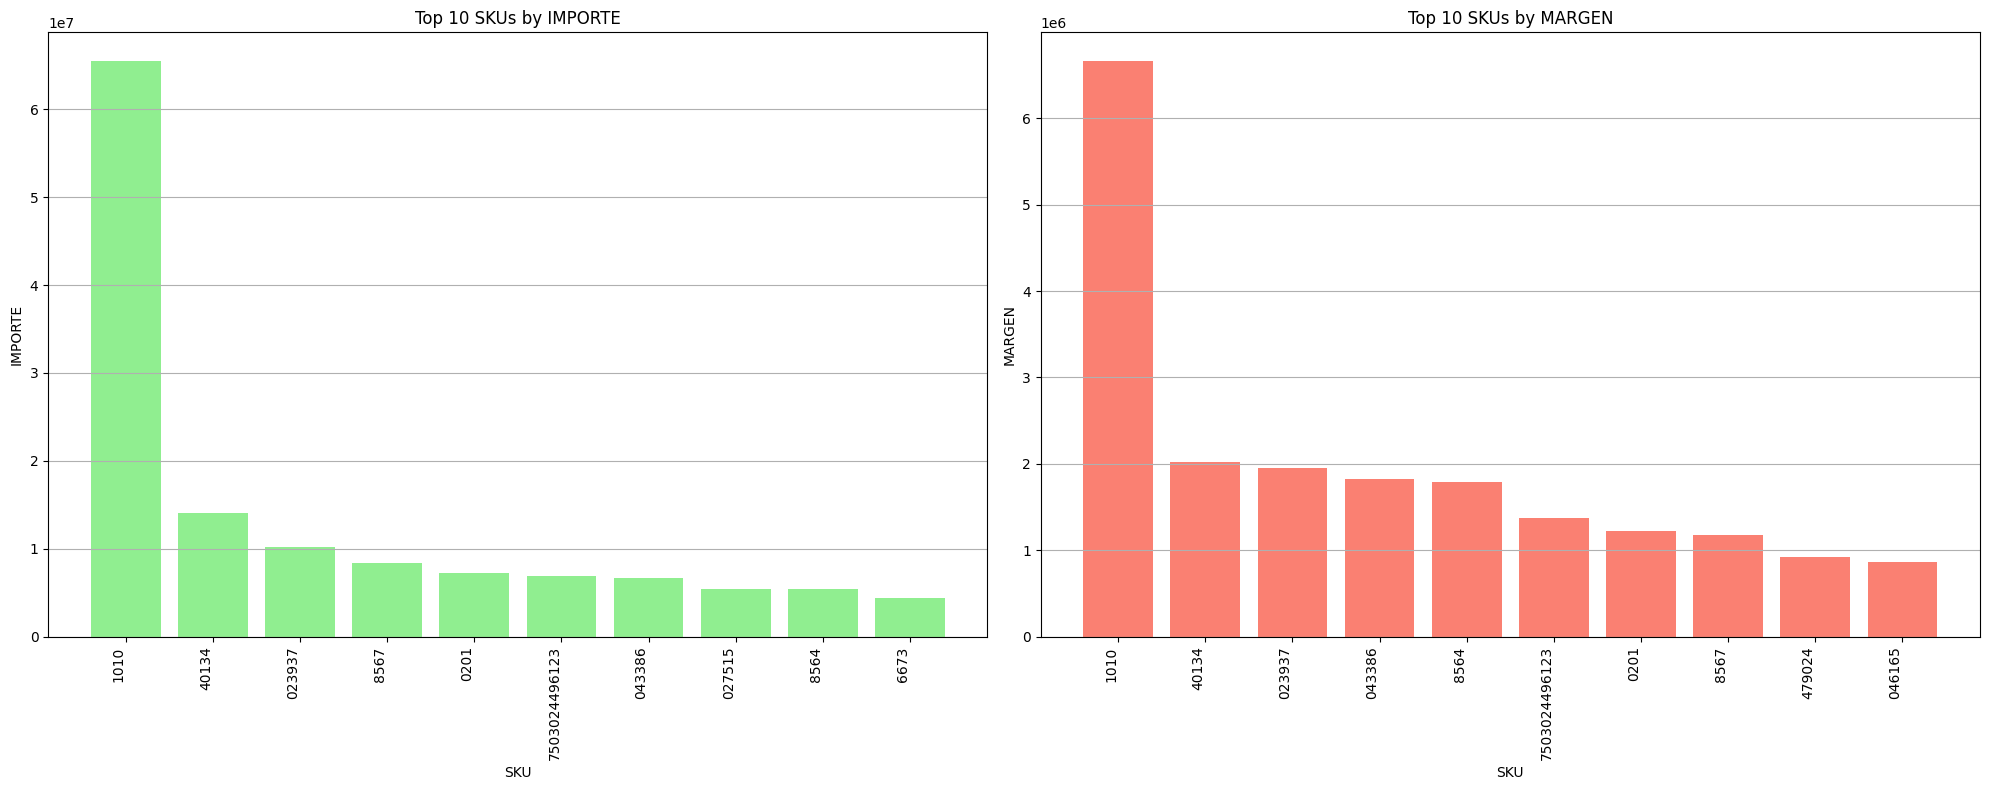

In [88]:
plt.figure(figsize=(20, 8))

# Se ordena por IMPORTE y se obtiene el top 10 de SKU's
top_10_importe_sku = performance_by_sku.sort_values(by='IMPORTE', ascending=False).head(10)

# Gráfico de barras para el top 10 de IMPORTE por SKU
plt.subplot(1, 2, 1)
plt.bar(top_10_importe_sku['SKU'].astype(str), top_10_importe_sku['IMPORTE'], color='lightgreen')
plt.title('Top 10 SKUs by IMPORTE')
plt.xlabel('SKU')
plt.ylabel('IMPORTE')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

# Se ordena por MARGEN y se obtiene el top 10 de SKU's
top_10_margen_sku = performance_by_sku.sort_values(by='MARGEN', ascending=False).head(10)

# Gráfico de barras para el top 10 de MARGEN por SKU's
plt.subplot(1, 2, 2)
plt.bar(top_10_margen_sku['SKU'].astype(str), top_10_margen_sku['MARGEN'], color='salmon')
plt.title('Top 10 SKUs by MARGEN')
plt.xlabel('SKU')
plt.ylabel('MARGEN')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Para completar la visualización y el reporte, crearé una tabla dinámica que muestre la suma de “IMPORTE” y “MARGEN” por “SUCURSAL REAL” y “LINEA”, según lo indicado.


In [89]:
pivot_table_sucursal_linea = pd.pivot_table(df, values=['IMPORTE', 'MARGEN'], index=['SUCURSAL REAL', 'LINEA'], aggfunc='sum')

print("Pivot Table: IMPORTE and MARGEN by SUCURSAL REAL and LINEA")
display(pivot_table_sucursal_linea.head())

Pivot Table: IMPORTE and MARGEN by SUCURSAL REAL and LINEA


IMPORTE        MARGEN
SUCURSAL REAL LINEA                                        
GONZALEX CHIH Abarrote           8.238454e+04  1.944466e+04
              Aguacate y Snacks  8.880728e+05  2.288188e+05
              Alas               5.138382e+06  1.418433e+06
              Filete de Pescado  1.008747e+06  1.278555e+05
              Hamburguesas       5.613799e+05  8.377958e+04

Para continuar con la visualización y el reporte, crearé una tabla dinámica que muestre la suma de “IMPORTE” y “MARGEN” por “SUBLINEA” y “SEGMENTO CLIENTE”, según lo indicado.


In [90]:
pivot_table_sublinea_segmento = pd.pivot_table(df, values=['IMPORTE', 'MARGEN'], index=['SUBLINEA', 'SEGMENTO CLIENTE'], aggfunc='sum')

print("Pivot Table: IMPORTE and MARGEN by SUBLINEA and SEGMENTO CLIENTE")
display(pivot_table_sublinea_segmento.head())

Pivot Table: IMPORTE and MARGEN by SUBLINEA and SEGMENTO CLIENTE


IMPORTE        MARGEN
SUBLINEA SEGMENTO CLIENTE                              
Alas     Institucionales     5.525854e+05  1.874551e+05
         Juarez A            8.081316e+06  9.086173e+05
         Juarez B            3.317494e+06  5.595400e+05
         Mayoreo             4.464200e+06  1.070818e+06
         Público en General  3.976434e+06  1.288066e+06

## Abordar Proyecciones para 2025 y Toma de Decisiones
### Subtarea:
Analizar cómo los insights obtenidos de los datos históricos de 2020 pueden informar estrategias de corto y mediano plazo, reconociendo la ausencia de datos directos de 2025 y proponiendo métodos para extrapolar tendencias históricas con el fin de generar estimaciones para 2025.


## Resumen:
### Preguntas y Respuestas (Q&A)

*   ¿Cómo pueden los insights de los datos históricos de 2020 informar estrategias de corto y mediano plazo y extrapolarse para estimaciones de 2025, reconociendo la falta de datos directos de 2025? Los datos de 2020 proporcionan una visión clara de las áreas con alto y bajo desempeño a través de sucursales, líneas de producto, segmentos de clientes, personal de ventas y SKUs específicos, basándose en ventas (“IMPORTE”) y rentabilidad (“MARGEN”). Estos insights son clave para orientar decisiones estratégicas de corto plazo, como campañas de marketing enfocadas, asignación de recursos y ajustes en el portafolio de productos.

Para las estimaciones de 2025, las tendencias históricas de 2020 pueden servir como una línea base fundamental. Las proyecciones pueden construirse mediante:

1.  Extrapolación de tendencias: Aplicar las tasas de crecimiento históricas identificadas o patrones observados en 2020 (por ejemplo, estacionalidad mensual o crecimiento por segmento) a un pronóstico de crecimiento anual general para 2025.

2.  Proyecciones específicas por segmento: Aprovechar los ratios de desempeño y tendencias identificadas en 2020 para segmentos, líneas o SKUs individuales y así crear pronósticos diferenciados.

3.  Modelado de escenarios: Desarrollar múltiples escenarios de proyección (optimista, pesimista y realista) considerando supuestos sobre crecimiento del mercado, cambios en el entorno competitivo y posibles mejoras operativas. Es fundamental reconocer que 2020 puede haber sido un año atípico e integrar pronósticos externos del mercado u opiniones de expertos para lograr estimaciones de 2025 más robustas.

### Hallazgos Clave del Análisis de Datos

*   Tendencias mensuales de desempeño: Enero de 2020 registró un IMPORTE total de aproximadamente 30.1 millones y un MARGEN cercano a 4.6 millones. En general, las principales métricas de ventas y rentabilidad mostraron una tendencia inicial decreciente durante los primeros meses de 2020.

*   Aspectos destacados del desempeño segmentado:

    *   Sucursales (SUCURSAL REAL): MAYOCAR fue la sucursal líder, generando 82.4 millones en IMPORTE y 12.1 millones en MARGEN.
    *   Líneas de producto (LINEA): Alas fue una de las líneas con mejor desempeño, con 25.5 millones en IMPORTE y 5.43 millones en MARGEN. Papas se destacó como la línea con mayor margen, aportando aproximadamente $10 millones en MARGEN. En contraste, las líneas Sin Definir y Administración presentaron márgenes cercanos a cero.
    *   Segmentos de clientes (SEGMENTO CLIENTE): Público en General fue el segmento más relevante, generando 57.1 millones en IMPORTE y 12.5 millones en MARGEN. Ventas In House mostró un margen muy bajo, alrededor de 1,800.
    *   Personal de ventas (VENDEDOR): DANIELA ALEJANDRA DELGADO CONCHA fue una vendedora destacada, alcanzando 54.6 millones en IMPORTE y 7.09 millones en MARGEN.
    *   Productos (SKU): El SKU 1010 fue el producto más rentable, generando aproximadamente 6.6 millones en MARGEN. Varios SKUs (por ejemplo, 1786, 7799) presentaron márgenes negativos o extremadamente bajos.
    *   Sub-líneas de producto (SUBLINEA): PECHUGAS DE POLLO fue la sublínea más rentable, con un MARGEN aproximado de 8.7 millones.

### Insights y Próximos Pasos

Asignación estratégica de recursos: Enfocar esfuerzos e inversiones en segmentos de alto desempeño como la sucursal MAYOCAR, las líneas Alas y Papas, el segmento Público en General y SKUs clave como 1010 para maximizar ventas y rentabilidad.

Optimización del desempeño: Analizar líneas de producto (Sin Definir, Administración) y SKUs específicos (por ejemplo, 1786) con márgenes negativos o muy bajos para determinar si requieren optimización, ajustes de precios o descontinuación, con el fin de mejorar la rentabilidad general.

Proyecciones informadas para 2025: Desarrollar pronósticos de ventas y márgenes para 2025 aplicando tasas de crecimiento de mercado esperadas sobre la base de desempeño de 2020. Distribuir estas proyecciones por mes y segmento utilizando la estacionalidad observada en 2020 y los ratios de desempeño por segmento, complementando el análisis con pronósticos externos del mercado para validar y refinar las estimaciones.